## Driverless AI - Python Scoring Pipeline（画像データ）実行サンプル（ローカル環境）
スコアリングフォルダ(scoring-pipeline)のexample.pyをJupyter上で実施したデモ

環境：
- Ubunto18.04（AWS EC2）をローカル環境として実行
- Driverless AI 1.9.1 Python Scoring Pipeline

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
from scipy.special._ufuncs import expit
from scoring_h2oai_experiment_3b309046_8c58_11eb_84a9_0242ac110002 import Scorer

2021-03-30 02:36:40,747 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   FDEBUG | openblas library at libopenblas.so.0
2021-03-30 02:36:40,794 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   FDEBUG | No MKL library loaded (normal)
2021-03-30 02:36:40,801 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   FDEBUG | Registered SegFault library for signals 'all'
2021-03-30 02:36:40,828 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   FDEBUG | omp library at libgomp.so.1
2021-03-30 02:36:41,346 C: NA  D:  NA    M:  NA    NODE:SERVER      8225   FDEBUG | Could not locate cudart (None) or other error: #_/home/ubuntu/py_scoring_test_img_20210325/scoring-pipeline/env/bin/python3.6 -m ipykernel_launcher -f /home/ubuntu/.local/share/jupyter/runtime/kernel-6dc57c13-4b05-4e5b-94d8-7ae0343502b1.jsonget_cuda_versions_subprocess: undefined symbol: cudaRuntimeGetVersion
2021-03-30 02:36:41,372 C: NA  D:  NA    M:  NA    NODE:SERVER      8225   FDEBUG | Could not locate cudnn (None) or other erro

In [2]:
scorer = Scorer()

2021-03-30 02:36:43,346 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | License manager initialized
2021-03-30 02:36:43,348 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | -----------------------------------------------------------------
2021-03-30 02:36:43,349 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Checking whether we have a valid license...
2021-03-30 02:36:43,351 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | No Cloud provider found
2021-03-30 02:36:43,352 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | License inherited from environment
2021-03-30 02:36:43,419 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | 
2021-03-30 02:36:43,421 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | license_version:1
2021-03-30 02:36:43,422 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | serial_number:3
2021-03-30 02:36:43,424 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | licensee_org

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,10 months and 16 days !!!
H2O_cluster_name:,DAI-H2O-RECIPES-1.9.
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.687 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


2021-03-30 02:36:44,795 C:  1% D:29.3GB  M:29.2GB  NODE:SERVER      8173   INFO   | RECIPE H2O-3 server started
2021-03-30 02:36:44,797 C:  1% D:29.3GB  M:29.2GB  NODE:SERVER      8173   INFO   | Started H2O version 3.30.0.3 at http://localhost:50351


***
#### Dataに関して
インプットデータ情報

| Name     | Type   | コメント               | 
| -------- | ------ | ---------------------- | 
| sex      | object | M or F      | 
| filename | object | 画像データのパスを指定 | 
|          |        |                        | 

カテゴリカルデータ（sex）と画像データ（filename）をインプットとする

In [3]:
# インプットカラム名
scorer.get_column_names()

('sex', 'filename')

アウトプットは5カテゴリの分類問題

In [4]:
# アウトプットのカテゴリ
scorer.get_target_labels()

['COVID-19', 'COVID-19, ARDS', 'Pneumocystis', 'SARS', 'Streptococcus']

***

### 画像データの確認

In [5]:
# パス上の画像ファイル
!ls sample_img/

1-s2.0-S0929664620300449-gr2_lrg-a.jpg	      4-x-day4.jpg
1-s2.0-S1684118220300682-main.pdf-002-a1.png  covid-19-pneumonia-44-day-0.jpeg
16654_1_1.png


In [6]:
from IPython.display import Image

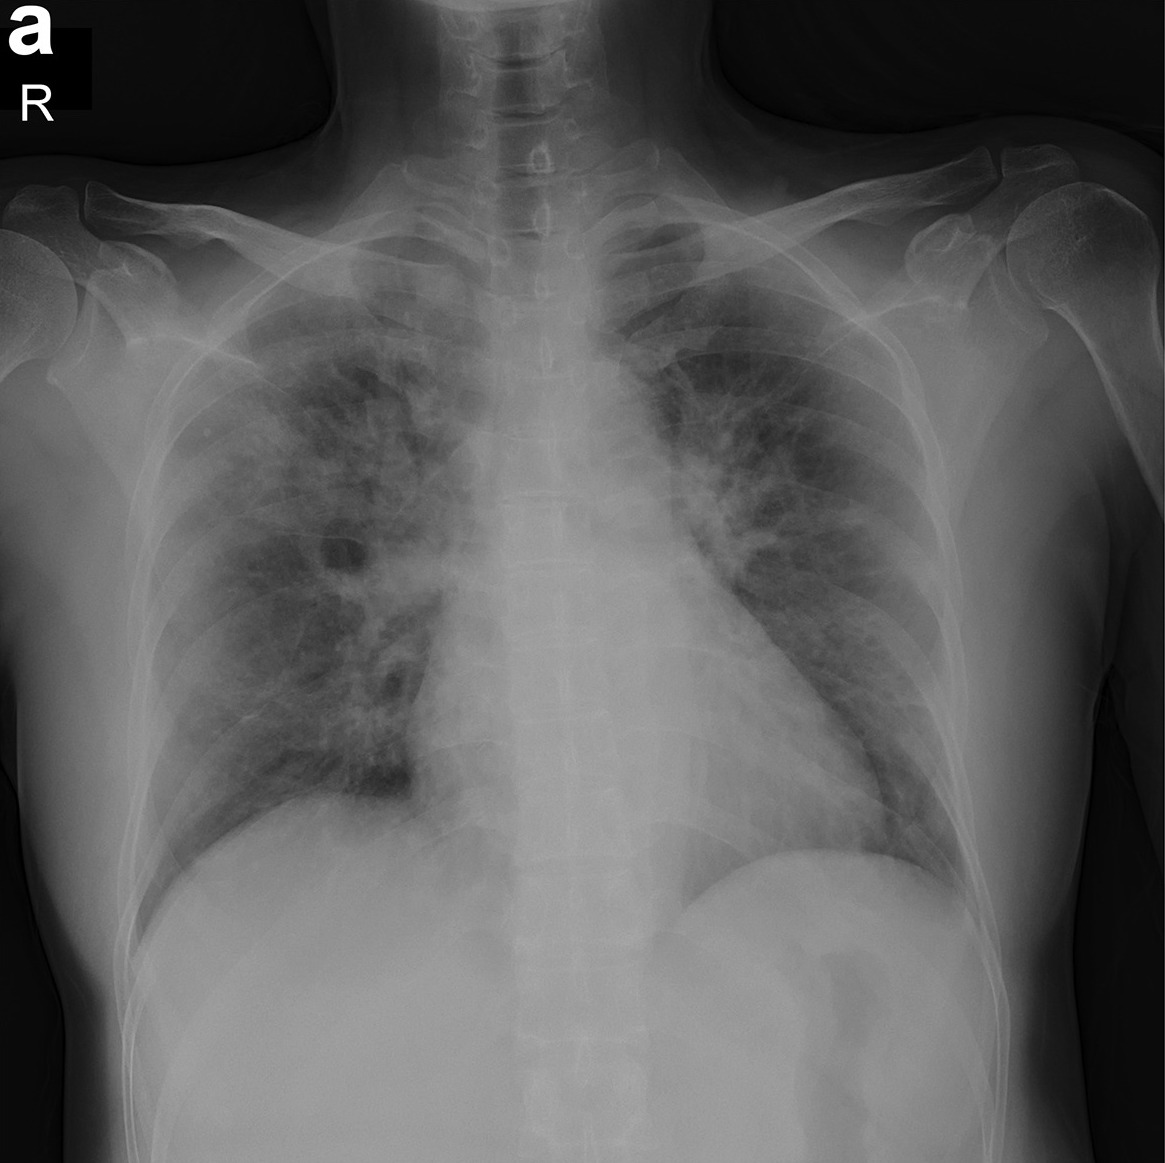

In [7]:
Image("sample_img/1-s2.0-S0929664620300449-gr2_lrg-a.jpg", width=200, height=200)

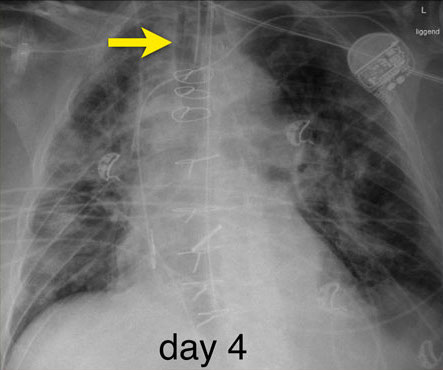

In [8]:
Image("sample_img/4-x-day4.jpg", width=200, height=200)

***

### Single Row Scoring

In [9]:
scorer.score([
    'M',  # sex
    'sample_img/1-s2.0-S0929664620300449-gr2_lrg-a.jpg',  # filename
],apply_data_recipes=False)

2021-03-30 02:37:10,015 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Using MOJO for predictions
2021-03-30 02:37:11,184 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | scored 1 rows using MOJO in 1.1051 seconds (1105.0918 millis per row)


[0.9418523907661438,
 0.009122892282903194,
 0.015432835556566715,
 0.018069718033075333,
 0.015522192232310772]

In [10]:
scorer.score([
    'M',  # sex
    'sample_img/16654_1_1.png',  # filename
],apply_data_recipes=False)

2021-03-30 02:37:12,028 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Using MOJO for predictions
2021-03-30 02:37:13,437 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | scored 1 rows using MOJO in 1.3430 seconds (1342.9868 millis per row)


[0.9439749121665955,
 0.008166220039129257,
 0.014906036667525768,
 0.02233917824923992,
 0.010613637045025826]

In [11]:
scorer.score([
    'F',  # sex
    'sample_img/4-x-day4.jpg',  # filename
],apply_data_recipes=False)

2021-03-30 02:37:13,464 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Using MOJO for predictions
2021-03-30 02:37:14,594 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | scored 1 rows using MOJO in 1.0683 seconds (1068.3072 millis per row)


[0.9312543272972107,
 0.014367695897817612,
 0.015448279678821564,
 0.013542110100388527,
 0.025387585163116455]

In [12]:
scorer.score([
    'M',  # sex
    '',  # filename
],apply_data_recipes=False)

# filenameを指定しない場合、欠損として処理される

2021-03-30 02:37:14,619 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   DATA   | Warning: column <<<'filename'>>> is of type bool, but should be str. Please check input data.
2021-03-30 02:37:14,624 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Using MOJO for predictions
2021-03-30 02:37:15,767 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | scored 1 rows using MOJO in 1.0822 seconds (1082.2072 millis per row)


[0.9714359045028687,
 0.00543480459600687,
 0.008691513910889626,
 0.006813678424805403,
 0.0076240841299295425]

In [13]:
scorer.score([
    'M',  # sex
    'sample_img/X___4-x-day4.jpg',  # filename
],apply_data_recipes=False)

# 画像ファイルが見つからない場合も、欠損として処理される

2021-03-30 02:37:15,908 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Using MOJO for predictions
MOJO scoring failed: Traceback (most recent call last):
  File "h2oaicore/models_utils.py", line 354, in h2oaicore.models_utils.predict_base_mojo
  File "h2oaicore/models_utils.py", line 385, in h2oaicore.models_utils.dai_mojo_predict
  File "h2oaicore/mli/commons/mli_commons.py", line 190, in h2oaicore.mli.commons.mli_commons.parallelize_work
  File "h2oaicore/models_utils.py", line 438, in h2oaicore.models_utils.dai_mojo_predict_subtask
Exception: mojo file       : '/home/ubuntu/Driverless_AI_ScoringPipelines/Python_Scoring/Local/tmp/scoring_user/h2oai_experiment_scoring_id/1e7c92d0-3.mojo'
input csv file  : '/home/ubuntu/Driverless_AI_ScoringPipelines/Python_Scoring/Local/tmp/scoring_user/h2oai_experiment_scoring_id/data_batch_bab27351-d.jay'
output csv file : '/home/ubuntu/Driverless_AI_ScoringPipelines/Python_Scoring/Local/tmp/scoring_user/h2oai_experiment_scoring_id/pred

[0.9714359045028687,
 0.00543480459600687,
 0.008691513910889626,
 0.006813678424805403,
 0.0076240841299295425]

***

### Batch Scoring

In [14]:
columns = [
    pd.Series(['M', 'M', 'F', 'M', 'F', 'F'], name='sex', dtype='object'),
    pd.Series(['sample_img/1-s2.0-S0929664620300449-gr2_lrg-a.jpg', 'sample_img/16654_1_1.png', 'sample_img/covid-19-pneumonia-44-day-0.jpeg', 'sample_img/1-s2.0-S1684118220300682-main.pdf-002-a1.png', 'sample_img/4-x-day4.jpg', ''], name='filename', dtype='object'),
]

In [15]:
df = pd.concat(columns, axis=1)
df

,sex,filename
0,M,sample_img/1-s2.0-S0929664620300449-gr2_lrg-a.jpg
1,M,sample_img/16654_1_1.png
2,F,sample_img/covid-19-pneumonia-44-day-0.jpeg
3,M,sample_img/1-s2.0-S1684118220300682-main.pdf-0...
4,F,sample_img/4-x-day4.jpg
5,F,


In [16]:
%%time
scorer.score_batch(df, apply_data_recipes=False)

2021-03-30 02:37:29,211 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Using MOJO for predictions
2021-03-30 02:37:31,109 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | scored 6 rows using MOJO in 1.8365 seconds (306.0803 millis per row)
CPU times: user 47.4 ms, sys: 87.2 ms, total: 135 ms
Wall time: 1.92 s


,finding.COVID-19,"finding.COVID-19, ARDS",finding.Pneumocystis,finding.SARS,finding.Streptococcus
0,0.941852,0.009123,0.015433,0.018070,0.015522
1,0.943975,0.008166,0.014906,0.022339,0.010614
2,0.909444,0.011282,0.021506,0.018065,0.039703
3,0.931066,0.015005,0.019233,0.021730,0.012967
4,0.931254,0.014368,0.015448,0.013542,0.025388
5,0.971279,0.005465,0.008739,0.006851,0.007666


#### 【推奨】datatable.Frameの利用

In [17]:
import datatable as dt

In [18]:
dt.Frame(df)

,sex,filename
,▪▪▪▪,▪▪▪▪
0,M,sample_img/1-s2.0-S0929664620300449-gr2_lrg-a.jpg
1,M,sample_img/16654_1_1.png
2,F,sample_img/covid-19-pneumonia-44-day-0.jpeg
3,M,sample_img/1-s2.0-S1684118220300682-main.pdf-002-a…
4,F,sample_img/4-x-day4.jpg
5,F,


In [19]:
%%time
scorer.score_batch(dt.Frame(df), apply_data_recipes=False)

2021-03-30 02:37:34,336 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Using MOJO for predictions
2021-03-30 02:37:36,241 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | scored 6 rows using MOJO in 1.8404 seconds (306.7281 millis per row)
CPU times: user 21.5 ms, sys: 85 ms, total: 107 ms
Wall time: 1.93 s


,finding.COVID-19,"finding.COVID-19, ARDS",finding.Pneumocystis,finding.SARS,finding.Streptococcus
0,0.941852,0.009123,0.015433,0.018070,0.015522
1,0.943975,0.008166,0.014906,0.022339,0.010614
2,0.909444,0.011282,0.021506,0.018065,0.039703
3,0.931066,0.015005,0.019233,0.021730,0.012967
4,0.931254,0.014368,0.015448,0.013542,0.025388
5,0.971279,0.005465,0.008739,0.006851,0.007666


***

### Shapley
- 最終部分のSoftmax関数が適用されていないことに注意

In [20]:
# スコアリング用データ
df

,sex,filename
0,M,sample_img/1-s2.0-S0929664620300449-gr2_lrg-a.jpg
1,M,sample_img/16654_1_1.png
2,F,sample_img/covid-19-pneumonia-44-day-0.jpeg
3,M,sample_img/1-s2.0-S1684118220300682-main.pdf-0...
4,F,sample_img/4-x-day4.jpg
5,F,


#### Shapley - Transformed Features

In [21]:
# Transformed featuresの名前
scorer.get_transformed_column_names()[:15]

['0_CVTE:sex.0',
 '0_CVTE:sex.1',
 '0_CVTE:sex.2',
 '0_CVTE:sex.4',
 '1_IMAGEVECTORIZER:filename.xception.00',
 '1_IMAGEVECTORIZER:filename.xception.01',
 '1_IMAGEVECTORIZER:filename.xception.02',
 '1_IMAGEVECTORIZER:filename.xception.03',
 '1_IMAGEVECTORIZER:filename.xception.04',
 '1_IMAGEVECTORIZER:filename.xception.05',
 '1_IMAGEVECTORIZER:filename.xception.06',
 '1_IMAGEVECTORIZER:filename.xception.07',
 '1_IMAGEVECTORIZER:filename.xception.09',
 '1_IMAGEVECTORIZER:filename.xception.10',
 '1_IMAGEVECTORIZER:filename.xception.11']

In [22]:
# Transformed features合計数
len(scorer.get_transformed_column_names())

98

In [23]:
# per-feature prediction contributions (Transformed)
pred_contribs1 = scorer.score_batch(df, pred_contribs=True, pred_contribs_original=False, fast_approx=False, apply_data_recipes=False) 
pred_contribs1

2021-03-30 02:37:43,095 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Not using MOJO for predictions since pred_contribs not yet implemented.
2021-03-30 02:37:49,723 C: 13% D:29.3GB  M:28.4GB  NODE:SERVER      8173   INFO   | Submitted    2 and Completed    2 non-identity feature engineering tasks out of    2 total tasks (including    0 identity)
2021-03-30 02:37:49,731 C: 13% D:29.3GB  M:28.4GB  NODE:SERVER      8173   INFO   | [LIGHTGBM] model predict Shapley (6, 98) start.
2021-03-30 02:37:49,795 C: 13% D:29.3GB  M:28.4GB  NODE:SERVER      8686   INFO   | [LIGHTGBM] Number of trees: 43
2021-03-30 02:37:49,810 C: 13% D:29.3GB  M:28.4GB  NODE:SERVER      8173   INFO   | [LIGHTGBM] model predict Shapley (6, 98) end. Took 0.07907 seconds.


,contrib_0_CVTE:sex.0.COVID-19,contrib_0_CVTE:sex.1.COVID-19,contrib_0_CVTE:sex.2.COVID-19,contrib_0_CVTE:sex.4.COVID-19,contrib_1_IMAGEVECTORIZER:filename.xception.00.COVID-19,contrib_1_IMAGEVECTORIZER:filename.xception.01.COVID-19,contrib_1_IMAGEVECTORIZER:filename.xception.02.COVID-19,contrib_1_IMAGEVECTORIZER:filename.xception.03.COVID-19,contrib_1_IMAGEVECTORIZER:filename.xception.04.COVID-19,contrib_1_IMAGEVECTORIZER:filename.xception.05.COVID-19,...,contrib_1_IMAGEVECTORIZER:filename.xception.90.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.92.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.93.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.94.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.95.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.96.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.97.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.98.Streptococcus,contrib_1_IMAGEVECTORIZER:filename.xception.99.Streptococcus,contrib_bias.Streptococcus
0,0.0,-0.000464,0.004793,0.009947,-0.036045,-0.034604,0.026194,-0.000794,-0.010606,-0.009925,...,-0.001105,0.001563,0.025675,0.0,-0.011936,0.0,-0.005440,0.0,0.0,-3.559258
1,0.0,0.000044,0.006619,0.012840,0.005963,-0.094651,0.043268,0.000504,-0.039805,0.001574,...,0.002825,0.001420,-0.002643,0.0,0.005224,0.0,0.000640,0.0,0.0,-3.559258
2,0.0,-0.001103,-0.057156,-0.011066,-0.005627,0.071648,-0.042828,0.000504,0.064020,0.008414,...,-0.002634,0.002853,-0.002643,0.0,0.010189,0.0,0.001080,0.0,0.0,-3.559258
3,0.0,-0.004749,0.015306,0.011839,-0.003941,0.020931,0.029092,0.000245,0.035593,-0.008838,...,0.002825,0.001215,0.025675,0.0,-0.011692,0.0,0.000640,0.0,0.0,-3.559258
4,0.0,0.000148,-0.066522,-0.029411,0.002300,0.044536,-0.012184,0.006019,0.038345,-0.018459,...,0.001703,0.002956,-0.002643,0.0,-0.023940,0.0,-0.020807,0.0,0.0,-3.559258
5,0.0,0.000019,-0.010998,-0.009353,0.002628,0.026479,-0.001188,0.001492,0.023724,0.007390,...,-0.001105,0.001185,-0.002643,0.0,0.004385,0.0,0.005712,0.0,0.0,-3.559258


In [24]:
# Targetカテゴリ数 * (Transformed features数 + Bias)
5 * (98 + 1)

495

#### Shapley - Original Features

In [25]:
# per-feature prediction contributions (Original)
pred_contribs2 = scorer.score_batch(df, pred_contribs=True, pred_contribs_original=True, fast_approx=False, apply_data_recipes=False)
pred_contribs2

2021-03-30 02:37:49,884 C: NA  D:  NA    M:  NA    NODE:SERVER      8173   INFO   | Not using MOJO for predictions since pred_contribs_original not yet implemented.
2021-03-30 02:37:56,455 C: 21% D:29.3GB  M:28.4GB  NODE:SERVER      8173   INFO   | Submitted    2 and Completed    2 non-identity feature engineering tasks out of    2 total tasks (including    0 identity)
2021-03-30 02:37:56,462 C: 21% D:29.3GB  M:28.4GB  NODE:SERVER      8173   INFO   | [LIGHTGBM] model predict Shapley (6, 98) start.
2021-03-30 02:37:56,526 C: 21% D:29.3GB  M:28.4GB  NODE:SERVER      8781   INFO   | [LIGHTGBM] Number of trees: 43
2021-03-30 02:37:56,582 C: 21% D:29.3GB  M:28.4GB  NODE:SERVER      8173   INFO   | [LIGHTGBM] model predict Shapley (6, 98) end. Took 0.11964 seconds.


,contrib_C1.COVID-19,contrib_age.COVID-19,contrib_clinical_notes.COVID-19,contrib_date.COVID-19,contrib_doi.COVID-19,contrib_extubated.COVID-19,contrib_filename.COVID-19,contrib_folder.COVID-19,contrib_in_icu.COVID-19,contrib_intubated.COVID-19,...,contrib_other_notes.Streptococcus,contrib_pO2_saturation.Streptococcus,contrib_patientid.Streptococcus,contrib_sex.Streptococcus,contrib_survival.Streptococcus,contrib_temperature.Streptococcus,contrib_url.Streptococcus,contrib_view.Streptococcus,contrib_went_icu.Streptococcus,contrib_bias.Streptococcus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.197556,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.007171,0.0,0.0,0.0,0.0,0.0,-3.559258
1,0.0,0.0,0.0,0.0,0.0,0.0,0.418486,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.006868,0.0,0.0,0.0,0.0,0.0,-3.559258
2,0.0,0.0,0.0,0.0,0.0,0.0,0.033156,0.0,0.0,0.0,...,0.0,0.0,0.0,0.059260,0.0,0.0,0.0,0.0,0.0,-3.559258
3,0.0,0.0,0.0,0.0,0.0,0.0,0.217086,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.007171,0.0,0.0,0.0,0.0,0.0,-3.559258
4,0.0,0.0,0.0,0.0,0.0,0.0,0.296462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.010986,0.0,0.0,0.0,0.0,0.0,-3.559258
5,0.0,0.0,0.0,0.0,0.0,0.0,0.836876,0.0,0.0,0.0,...,0.0,0.0,0.0,0.011872,0.0,0.0,0.0,0.0,0.0,-3.559258


In [26]:
# filename,sex,biasのみ（これら以外の説明変数は利用していない）の変数名のList
list_filename = [name for name in pred_contribs2.columns if 'filename' in name]
list_sex = [name for name in pred_contribs2.columns if 'sex' in name]
list_bias = [name for name in pred_contribs2.columns if 'bias' in name]
[*list_filename, *list_sex, *list_bias]

['contrib_filename.COVID-19',
 'contrib_filename.COVID-19, ARDS',
 'contrib_filename.Pneumocystis',
 'contrib_filename.SARS',
 'contrib_filename.Streptococcus',
 'contrib_sex.COVID-19',
 'contrib_sex.COVID-19, ARDS',
 'contrib_sex.Pneumocystis',
 'contrib_sex.SARS',
 'contrib_sex.Streptococcus',
 'contrib_bias.COVID-19',
 'contrib_bias.COVID-19, ARDS',
 'contrib_bias.Pneumocystis',
 'contrib_bias.SARS',
 'contrib_bias.Streptococcus']

In [27]:
pred_contribs2[[*list_filename, *list_sex, *list_bias]]

,contrib_filename.COVID-19,"contrib_filename.COVID-19, ARDS",contrib_filename.Pneumocystis,contrib_filename.SARS,contrib_filename.Streptococcus,contrib_sex.COVID-19,"contrib_sex.COVID-19, ARDS",contrib_sex.Pneumocystis,contrib_sex.SARS,contrib_sex.Streptococcus,contrib_bias.COVID-19,"contrib_bias.COVID-19, ARDS",contrib_bias.Pneumocystis,contrib_bias.SARS,contrib_bias.Streptococcus
0,0.197556,-0.338587,-0.175552,0.041889,-0.227330,0.014276,-0.000426,-0.018695,-0.054902,-0.007171,0.099987,-3.986229,-3.605284,-3.628779,-3.559258
1,0.418486,-0.225600,0.023640,0.461696,-0.383857,0.019504,-0.000288,-0.028712,-0.038697,-0.006868,0.099987,-3.986229,-3.605284,-3.628779,-3.559258
2,0.033156,-0.338653,-0.034752,-0.258288,0.432415,-0.069324,-0.000937,-0.040658,0.032034,0.059260,0.099987,-3.986229,-3.605284,-3.628779,-3.559258
3,0.217086,0.198063,0.092386,0.243315,-0.368051,0.022396,-0.000288,-0.027352,-0.032720,-0.007171,0.099987,-3.986229,-3.605284,-3.628779,-3.559258
4,0.296462,0.115912,-0.177705,-0.292702,0.246664,-0.095785,-0.000569,-0.015381,-0.008583,0.010986,0.099987,-3.986229,-3.605284,-3.628779,-3.559258
5,0.836876,-0.277275,-0.170289,-0.401643,-0.377917,-0.020333,-0.000288,-0.018695,-0.007260,0.011872,0.099987,-3.986229,-3.605284,-3.628779,-3.559258
